## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(study_results_df, mouse_metadata_df, how="left", on=["Mouse ID"])

# Display the data table for preview
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Check the number of mice.
mouse_count = len(data_complete["Mouse ID"].unique())
mouse_count

249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
duplicate_mouse_id = data_complete.loc[data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Drop any duplicate rows
duplicate_mouses = data_complete[data_complete["Mouse ID"]=="g989"]
duplicate_mouses
clean_data = data_complete[data_complete["Mouse ID"].isin(duplicate_mouse_id)==False]
clean_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Recheck the number of mice
distinct_mouse_id = len(clean_data["Mouse ID"].unique())
distinct_mouse_id

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
summary_stats = clean_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

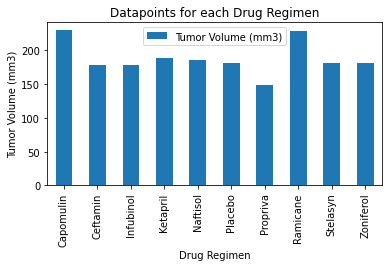

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
grouped_drug_regimen = clean_data.groupby("Drug Regimen")
grouped_drug_regimen
# grouping mean of tumor volume against each drug regimen
count_vol_drug = grouped_drug_regimen["Tumor Volume (mm3)"].count().to_frame()
count_vol_drug
# Bar plot showing total volume against each drug regimen
count_vol_drug.plot(kind="bar", figsize=(6,3))
plt.title("Datapoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
plt.tight_layout()
#count_vol_drug.index.values

In [14]:
count_vol_drug = count_vol_drug.reset_index()
count_vol_drug

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


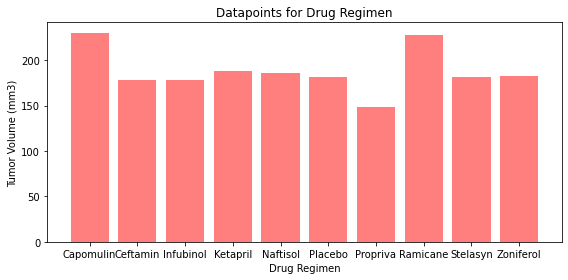

In [17]:
# General identical bar plot using pyplot instead of pandas.
#y_axis = np.arange(len(clean_data["Mouse ID"])
#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
#x_axis = count_vol_drug.index.values
#tickLocations = [value for value in x_axis]
#y_axis = count_vol_drug.values
plt.figure(figsize=(8, 4))
plt.bar(count_vol_drug["Drug Regimen"], count_vol_drug["Tumor Volume (mm3)"], color='r', alpha=0.5, align="center")
#plt.xticks(tickLocations, list(avg_vol_drug.index), rotation="vertical") 
#plt.xlim(-0.75, len(x_axis) - 0.25)
#plt.ylim(0, 60)
plt.title("Datapoints for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

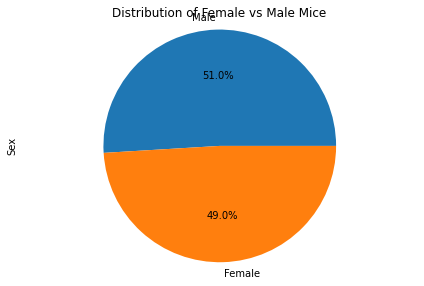

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_count = clean_data["Sex"].value_counts()
plt.figure()
mice_count.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of Female vs Male Mice")
plt.tight_layout()
plt.show()

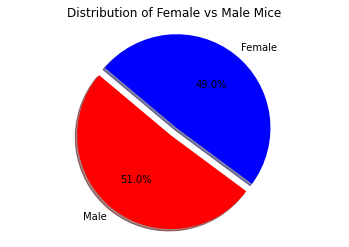

In [10]:
# Generate identical pie plot using pyplot
colors = ["red","blue"]
explode = (0.1,0)
plt.figure()
plt.pie(mice_count.values, explode=explode, labels=mice_count.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes - equal, so there is perfect circle
plt.axis("equal")
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# regimen_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin") | 
#                           (clean_data["Drug Regimen"] == "Ramicane") | 
#                           (clean_data["Drug Regimen"] == "Infubinol") | 
#                           (clean_data["Drug Regimen"] == "Ceftamin")]
max_data = clean_data.groupby("Mouse ID").max()["Timepoint"]
max_data = max_data.reset_index()
max_data

merge_data = max_data.merge(clean_data,on=["Mouse ID", "Timepoint"], how='left')
merge_data

# regimen_data = regimen_data[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
# regimen_data = regimen_data.groupby(["Mouse ID", "Drug Regimen"])
# drug_regimen = regimen_data["Tumor Volume (mm3)"].max().to_frame()
# regimen_plot = drug_regimen["Tumor Volume (mm3)"]
# drug_regimen

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [24]:
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_vol = []

for drug in drug_list:
    tumor_vol = merge_data.loc[merge_data["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    final_tumor_vol.append(tumor_vol)
    # Calculate quartiles, IQR, and identify potential outliers for each regimen.
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q-lower_q
    # determine if there are any potential outliers. 
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    #Calculate outlier
    outlier=tumor_vol.loc[(tumor_vol<lower_bound)|(tumor_vol>upper_bound)]
    print(f"{drug} {outlier}")

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


In [20]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.
# quartiles = regimen_plot.quantile([.25,.5,.75])
# lower_q = quartiles[0.25]
# upper_q = quartiles[0.75]
# iqr = upper_q-lower_q

# # Calculate the IQR and quantitatively determine outliers
# print(f"The lower quartile of Tumor Volume (mm3) is: {lower_q}")
# print(f"The upper quartile of Tumor Volume (mm3) is: {upper_q}")
# print(f"The IQR range of Tumor Volume (mm3) is: {iqr}")
# print(f"The median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

# # determine if there are any potential outliers. 
# lower_bound = lower_q - (1.5*iqr)
# upper_bound = upper_q + (1.5*iqr)

# # Determine outliers using upper and lower bounds
# print(f"Values below {lower_bound} are possible outliers.")
# print(f"Values above {upper_bound} are possible outliers.")

The lower quartile of Tumor Volume (mm3) is: 45.5098442875
The upper quartile of Tumor Volume (mm3) is: 59.930261755000004
The IQR range of Tumor Volume (mm3) is: 14.420417467500002
The median of Tumor Volume (mm3) is: 46.860058175 
Values below 23.87921808625 are possible outliers.
Values above 81.56088795625001 are possible outliers.


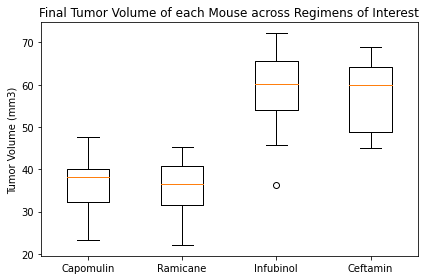

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
fig, intr = plt.subplots()
intr.set_title('Final Tumor Volume of each Mouse across Regimens of Interest')
intr.set_ylabel('Tumor Volume (mm3)')
intr.boxplot(final_tumor_vol,labels=drug_list)
plt.tight_layout()
plt.show()


## Line and Scatter Plots

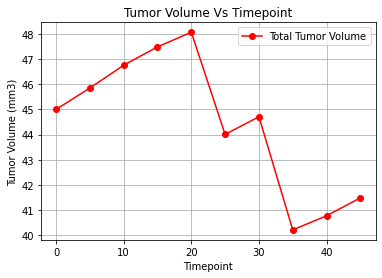

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse (l509) which was treated with Capomulin
tumor_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509")]
# tumor_data = tumor_data.groupby(["Drug Regimen", "Timepoint"])
# tumor_data_avg = tumor_data["Tumor Volume (mm3)"].mean().to_frame()
# tumor_index = tumor_data_avg.unstack(0)
# tumor_plot = tumor_index["Tumor Volume (mm3)"]
tumor_data
x_axis = tumor_data["Timepoint"]
y_axis = tumor_data["Tumor Volume (mm3)"]
plt.figure()
total_tumor, = plt.plot(x_axis, y_axis, marker= "o", color="r", label="Total Tumor Volume" )
plt.legend(handles=[total_tumor], loc="best")
plt.title("Tumor Volume Vs Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()

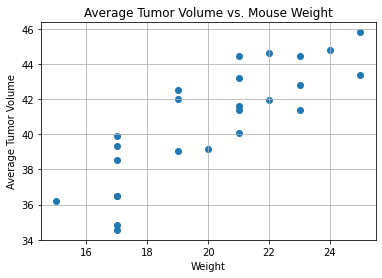

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
scatter_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin")]
scatter_data = scatter_data[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
grouped_drug_regimen = scatter_data.groupby(["Mouse ID"]).mean()
#scatter_data_group = grouped_drug_regimen["Tumor Volume (mm3)"].mean().to_frame()
#scatter_data_group = scatter_data_group.reset_index()
#scatter_data_group
grouped_drug_regimen
plt.scatter(grouped_drug_regimen["Weight (g)"], grouped_drug_regimen["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.grid(True)
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84
The r-squared is: 0.7088568047708717


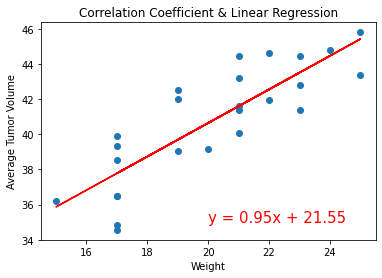

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_axis = grouped_drug_regimen["Weight (g)"]
y_axis = grouped_drug_regimen["Tumor Volume (mm3)"]

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the previous scatter plot
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.title("Correlation Coefficient & Linear Regression")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
#Observations and Inferences
#________________________________________________________________________________________________________
# Average tumor volume is almost close to the same number for the drugs Capomulin and Ramicane
# The relationship between weight and avg tumor seems to be directly proportional - as the weight increases, the average tumor volume increases; correlation; 
# When considering this specific mouse id(l509) for the specific drug Capomulin, decreased first but started to increase with only one value on outliers
# Data related to metastatic sites and age-months were not used much throughout the analysis

# Observations and Insights